In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [2]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [3]:
enc.categories_

[array([0, 1, 2])]

In [5]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0606 - accuracy: 0.3500
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9976 - accuracy: 0.2667
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9438 - accuracy: 0.5500
Epoch 4/100
4/4 [==============================] - 0s 1000us/step - loss: 0.9083 - accuracy: 0.6500
Epoch 5/100
4/4 [==============================] - 0s 999us/step - loss: 0.8659 - accuracy: 0.6500
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8306 - accuracy: 0.6583
Epoch 7/100
4/4 [==============================] - 0s 1000us/step - loss: 0.7929 - accuracy: 0.6750
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7586 - accuracy: 0.6917
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7194 - accuracy: 0.8000
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6821 - accuracy: 0.8417
Epoch 11/100
4/4 [===

In [10]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1006 - accuracy: 0.9667 - 113ms/epoch - 113ms/step


[0.10061179846525192, 0.9666666388511658]

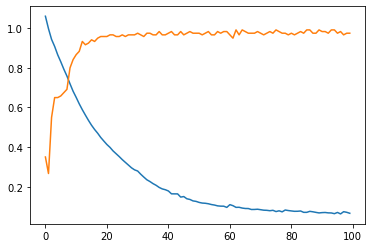

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])